<a href="https://colab.research.google.com/github/chomu37/snu-factcheck-analytics/blob/main/factcheck_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 준비
* 자료 분석 시, 사전에 등록되어 있지 않은 단어를 추가
* matplotlib 에서 한글이 제대로 표시되도록 한글 폰트 추가
* 자료 수집과 분석을 하기 전, 필요한 라이브러리를 불러오기

## KoNLPy, mecab-ko-dic 설치 및 사용자 사전 추가

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 1.3 MB/s 


In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash ./install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 3.41 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-01-20 04:30:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=6C98wh

In [ ]:
user_word = ['문재인', '가상화폐', '전동킥보드', '서울교통공사', '성소수자', 'LH', '한일', '이중잣대', '은마아파트', '중국사', 'MB', '전단',
             '냉동정자', '민주화', '문준용', '후쿠시마', '의대', '새누리당', '4대강', '미래통합당', '통합당', '산업안전보건법', '최숙현',
             '대전현충원', '국립서울현충원', '보훈처', 'OECD', '대진연', 'n번방', '한국당', '사개특위', '법사위', '보니하니', 'tbs',
             '공수처', '인턴', '내외국인', '근로기준법', '인지', 'YG', '국회의장', 'ILO', '무상교육', '손배청구', '변호인단', '5G',
             '미미쿠키', '조선노동당', '미가입', '한국수자원공사', '전자담배', '국민재산되찾기운동본부', '거세', '유리천장', '세월호',
             '국민의당', '국민의힘', '팩트체크', '바른정당', '공보단장', '통합신당', '신당', '윤리위', '신도시', '친중']

In [ ]:
%cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as dic_file:
  user_dic = dic_file.readlines()
user_dic.extend([f"{i},,,,NNP,*,{'F' if ord(i[-1]) % 28 == 16 else 'T'},{i},*,*,*,*,*\n" for i in user_word])
with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as dic_file:
  for line in user_dic:
    dic_file.write(line)

In [ ]:
!bash ./tools/add-userdic.sh

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./user-place.csv ... 2
reading ./Place-address.csv ... 19301
reading ./VX.csv ... 125
reading 

In [ ]:
with open("./user-nnp.csv", 'r', encoding='utf-8') as user_dic:
  file_data = user_dic.readlines()
file_data = [",".join([k if j != 3 else "0" for j,k in enumerate(i.split(","))]) for i in file_data]
with open("./user-nnp.csv", 'w', encoding='utf-8') as user_dic:
  for line in file_data:
    user_dic.write(line)

In [ ]:
!make clean
!make install

test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./user-place.csv ... 2
reading ./Place-address.csv ... 19301
reading ./VX.csv ... 125
reading ./Symbol.csv ... 16
reading ./EC.csv ... 2547
reading ./user-nnp.csv ... 67
reading ./ETN.csv ... 14
reading ./Hanja.csv ... 125750
reading ./IC.csv ... 1305
reading ./NorthKorea.csv ... 3
reading ./Foreign.csv ... 11690
reading ./VV.csv ... 7331
reading ./MM.csv ... 453
reading ./ETM.csv ... 133
reading ./NNP.csv ... 2371
reading ./NNB.csv ... 140
reading ./VCP.csv ... 9
reading ./user-person.csv ... 1
reading ./CoinedWord.csv ... 148
reading ./NNBC.csv ... 677
reading ./Inflect.csv ... 44820
reading ./Group.csv ... 3176
reading ./VCN.csv ... 7
reading ./Wikipedia.csv ... 36762
reading ./J.csv ... 416
reading

## matplotlib 한글 폰트 설치

In [ ]:
!apt-get install update -qq
!apt-get install fonts-nanum* -qq

E: Unable to locate package update
Selecting previously unselected package fonts-nanum.
(Reading database ... 155535 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()

* 런타임 재실행 필요 (Ctrl + M .)

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

## 라이브러리 불러오기


In [2]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from copy import deepcopy as dc
from tqdm import tqdm
import yaml
from collections import Counter


## 개인 Git 불러오기

In [3]:
%cd /
!if [ -d "/content/snu-factcheck-analytics" ]; then rm -rf /content/snu-factcheck-analytics; fi

/


In [4]:
%cd /content
!git clone https://github.com/chomu37/snu-factcheck-analytics.git

/content
Cloning into 'snu-factcheck-analytics'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 138 (delta 70), reused 117 (delta 51), pack-reused 0
Receiving objects: 100% (138/138), 7.00 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [5]:
%cd /content/snu-factcheck-analytics
from scrap.classes import *

/content/snu-factcheck-analytics


# 자료 수집 및 분석

# 자료 분석 및 해석
* 수집한 자료 분석 후 원하는 데이터 추출
* 추출한 데이터 해석

In [6]:
# 발언을 기준으로 스크래핑한 DB를 팩트체크를 기준으로 변경하는 코드입니다.
fc_dict = {}

for key, value in tqdm(speaks_dict.items()):
    sp_info = value.copy() # 발언의 정보를 복사합니다.
    factchecks = sp_info.pop('factchecks') # 발언의 정보에서 팩트체크를 분리합니다.
    for id, fc in factchecks.items():
        fc_info = fc.copy() # 팩트체크의 정보를 복사합니다.
        fc_info.update(sp_info) # 팩트체크의 정보에 발언의 정보를 추가합니다.
        if id in fc_dict:
            print(id)
        fc_dict[id] = fc_info # 팩트체크의 정보를 딕셔너리에 추가합니다.
print(len(fc_dict))

100%|██████████| 3292/3292 [00:00<00:00, 244292.37it/s]

3549


## 카테고리

In [7]:
# 카테고리를 태그화 합니다.
category = set()
for info in speaks_dict.values():
    category|=info['categories']
category_split = set()
for ct in category:
    category_split |= set(ct.split(', '))
print(category_split)
for info in fc_dict.values():
    info['categories'] = ", ".join(info['categories'])
    info['splited_cat'] = set(cat for cat in category_split if cat in info['categories'])

{'코로나 바이러스', 'IT/과학', '4.7 재보선', '새정부', '국제', '정치인(공직자)과 관련된 사실', '경제', '사회', '코로나백신', '국회의원 선거', '대통령 선거', '19대 대선', '정치인(공직자)의 발언', '정치', '6.13 지방선거', '지방 선거', '4.15 총선', '20대 대통령 선거', '기타', '문화'}


In [8]:
fc_df = pd.DataFrame(fc_dict).T
fc_df.head(1)

,content,date,score,time,categories,explain,source,speaker,title,splited_cat
1,검증내용 <앵커>대선 국면에 접어들면서 저희 사실은 코너에선 선거 관련 가짜 뉴스와...,2017.03.29,3,09:51,"정치인(공직자)과 관련된 사실, 정치, 19대 대선, 대통령 선거",현재 지지율 1위 문재인 민주당 경선 후보 아들의 취업특혜 논란과 관련된 가짜 뉴스...,{'[사실은] 문재인 아들 취업 특혜 논란…감사 내용 보니': 'http://new...,문재인,현재 지지율 1위 문재인 민주당 경선 후보 아들과 관련한 취업특혜 논란이 있다.,"{정치인(공직자)과 관련된 사실, 대통령 선거, 19대 대선, 정치}"


In [9]:
cat_list = list(category_split)
cat_list.sort()
cat_df = pd.DataFrame([[cat in info["splited_cat"] for cat in cat_list] for id, info in fc_dict.items()], index=fc_df.index, columns=cat_list)
cat_df

,19대 대선,20대 대통령 선거,4.15 총선,4.7 재보선,6.13 지방선거,IT/과학,경제,국제,국회의원 선거,기타,대통령 선거,문화,사회,새정부,정치,정치인(공직자)과 관련된 사실,정치인(공직자)의 발언,지방 선거,코로나 바이러스,코로나백신
1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False
26,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False
27,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False
12736,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False
12738,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False
12732,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False


## 구문 분석

In [10]:
non_use =["중", "것", "때", "명", "개", "억", "일", "때문", "등","대","월", "전", "만", "천", "백", "원", "십", "수", "후", "년", "건", "말", "시", "대", "내", "위"]
def noun_anal(i:str):
  return tuple(i for i in Mecab().nouns(i) if i not in non_use)

In [11]:
fc_df["content_word"] = fc_df["content"].apply(noun_anal)
fc_df["title_word"] = fc_df["title"].apply(noun_anal)
fc_df["explain_word"] = fc_df["explain"].apply(noun_anal)
fc_df.head(1)

,content,date,score,time,categories,explain,source,speaker,title,splited_cat,content_word,title_word,explain_word
1,검증내용 <앵커>대선 국면에 접어들면서 저희 사실은 코너에선 선거 관련 가짜 뉴스와...,2017.03.29,3,09:51,"정치인(공직자)과 관련된 사실, 정치, 19대 대선, 대통령 선거",현재 지지율 1위 문재인 민주당 경선 후보 아들의 취업특혜 논란과 관련된 가짜 뉴스...,{'[사실은] 문재인 아들 취업 특혜 논란…감사 내용 보니': 'http://new...,문재인,현재 지지율 1위 문재인 민주당 경선 후보 아들과 관련한 취업특혜 논란이 있다.,"{정치인(공직자)과 관련된 사실, 대통령 선거, 19대 대선, 정치}","(검증, 내용, 앵커, 대선, 국면, 저희, 코너, 선거, 관련, 가짜, 뉴스, 대...","(지지율, 문재인, 민주당, 경선, 후보, 아들, 관련, 취업, 특혜, 논란)","(지지율, 문재인, 민주당, 경선, 후보, 아들, 취업, 특혜, 논란, 관련, 가짜..."


In [12]:
fc_kw = [sum(fc_df[i],()) for i in ["content_word", "title_word", "explain_word"]]
fc_kw_set = set(sum(fc_kw, ()))
print(len(fc_kw_set),fc_kw_set)

30236 {'바스', '언명', '공인회계사', '근해', '사죄', '개정', '패스워드', '가자지구', '재외', '환절기', '계발', '나카소네', '성명문', '김주원', '관람자', '완전', '김한길', '地獄', '도시', '문화제', '타코마', '변이형', '차치', '연중무휴', '도추', '식장', '주변', '청', '트루먼', '진통제', '신경망', '최대량', '통설', '윤형', '김영규', '정부통령', '선크림', '강구', '創立', '洞', '산분', '감리회', '초구', '미적분', '수련생', '핵무기', '서명인', '성장산업', '캐치프레이즈', '민경욱', '한반도기', '中企', '결원', '황국', '규정', '후략', '대책특위', '한일', '운송장', '화학자', '딴죽걸기', '역사박물관', '시뮬레이션', '저항권', '자강', '국전', '세무', '데일리안', '대책', '특수강', '불가리스', '트리플', '등장', '보병', '호평', '새것', '약방문', '웨딩', '셀카', '사저', '문제점', '김동원', '금광면', '경영계', '인계', '화고', '大竹', '상하', '이익금', '부지', '벡', '윤태', '사망률', '연수구', '용접부', '사위', '프라이버시', '오쿠마', '공공요금', '교습', '라스베이거스', '표직', '게이츠', '서운', '피란민', '성원', '위경죄', '신지혜', '개월', '致賻', '대진연', '정문호', '原子', '黑', '영분', '경원선', '만주어', '사생결단', '유방암', '천만', '대의원', '친지', '박연차', '검토관', '레이먼드', '공예품', '콜럼', '대통령령', '김동술', '대일', '내거', '마피아', '김병권', '민예총', '인성', '소방장', '자화상', '광범위', '근황', '야권', '판매장', '타이틀', '유선', '옥기', '비열', '강상', '신문', '발매', '액

In [ ]:
yaml.dump(fc_kw_set, open("/content/word_set.yaml", 'w', encoding="utf-8"), default_flow_style=False, allow_unicode=True, Dumper=yaml.SafeDumper)

In [14]:
fc_words = fc_df[["content_word", "title_word", "explain_word"]]
fc_words.to_csv("/content/fc_words.csv",encoding="utf-8")
fc_words.head(3)

,content_word,title_word,explain_word
1,"(검증, 내용, 앵커, 대선, 국면, 저희, 코너, 선거, 관련, 가짜, 뉴스, 대...","(지지율, 문재인, 민주당, 경선, 후보, 아들, 관련, 취업, 특혜, 논란)","(지지율, 문재인, 민주당, 경선, 후보, 아들, 취업, 특혜, 논란, 관련, 가짜..."
26,"(검증, 내용, 민주당, 문재인, 후보, 아들, 한국, 고용, 정보원, 채용, 과정...","(지지율, 문재인, 민주당, 경선, 후보, 아들, 관련, 취업, 특혜, 논란)","(지지율, 문재인, 민주당, 경선, 후보, 아들, 취업, 특혜, 논란, 관련, 가짜..."
27,"(검증, 내용, 민주당, 경선, 후보, 확정, 문재인, 대표, 대선, 선전, 최대,...","(지지율, 문재인, 민주당, 경선, 후보, 아들, 관련, 취업, 특혜, 논란)","(지지율, 문재인, 민주당, 경선, 후보, 아들, 취업, 특혜, 논란, 관련, 가짜..."


AttributeError: ignored

In [18]:
for name in ["content_word", "title_word", "explain_word"]:
  df = pd.DataFrame(dict(fc_words[name].apply(Counter))).fillna(0).astype("int8").T
  df.to_csv("/content/%s.csv"%name, encoding="utf-8")

In [32]:
for i in range(3):
  df = content_df.iloc(axis=1)[i*10000:(i+1)*10000]
  df.to_csv("/content/content_word%d.csv"%i, encoding="utf-8")

In [20]:
content_df = pd.DataFrame(dict(fc_words["content_word"].apply(Counter))).fillna(0).astype("int8").T
content_df.shape

(3549, 29479)

In [43]:
fc_cont_word_count = pd.DataFrame(dict(fc_words["content_word"].apply(Counter))).fillna(0).astype("int8").T
fc_cont_word_count

,검증,내용,앵커,대선,국면,저희,코너,선거,관련,가짜,뉴스,후보,논란,집중,홈페이지,지지율,문재인,민주당,아들,취업,특혜,요청,오늘,문제,박세용,기자,핵심,정리,노무현,정부,시절,한국,고용,정보원,공기업,합격,당시,원장,청와대,근무,...,앞뜰,배웅,레지옹,고별,슈트라이히,발터,안네,그레트,카렌바우어,올라프,숄츠,한국여성단체연합,상탭니다,피복비,衣食,정희태,이진혁,임준,이한주,조희숙,수용비,팔당,대심,연다산동,삼성동,공공사업,부양책,호고,배준영,옹진,노령화지수,립도,과천시,용도지역,진안군,완도군,청평면,관광단지로,대택,산업별
1,3,5,6,3,1,2,1,1,3,2,2,12,4,2,1,1,8,2,7,3,6,1,1,2,1,6,1,1,1,5,1,1,6,4,2,3,5,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,3,5,0,0,0,0,0,0,0,0,0,4,3,0,1,0,2,2,4,0,3,0,0,1,0,0,1,0,0,0,0,1,5,4,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,3,2,0,2,0,0,0,0,8,0,0,1,1,0,0,0,5,2,3,3,11,0,0,7,0,1,0,0,0,2,0,4,13,11,0,1,7,2,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,3,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,6,2,0,2,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12736,6,6,0,3,0,0,0,0,2,0,0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12738,6,2,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12732,6,2,0,2,0,0,0,0,1,0,0,5,0,0,0,0,3,1,0,0,0,0,0,1,0,0,0,0,3,30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fc_cont_word_count.corr()

In [ ]:
fc_kw_ct = pd.DataFrame({i:[j.count(i) for j in fc_words["content_word"]] for i in tqdm(fc_kw_set)}, index=fc_words.index)

100%|██████████| 30236/30236 [20:18<00:00, 24.80it/s]


In [ ]:
fc_kw_ct.index = fc_words.index

,한미정,눈사태,출연,해년,체인점,활성,자선,아르바이트,메일,부평,멜,그동안,시보드,폴리머,권고문,앙고,도라산,단증,주기론,마음가짐,끝판,한주,선두,바이트,밀담,어패,구의역,김연명,박두준,하이트진로,담도,선거철,란트,오이소박이,로테이션,판상,양성애자,권한,하굣길,명예직,...,산,교대,사법위,노사,임수정,지배력,천만,장본인,초과액,김관,애국자,이용대,월건,역할,만나,객실,장구,전경련,신해철,경이,이항복,지그문트,長谷,정수석,변온,학교장,로드리게스,박창규,트럭,고서,국교,김대근,가칭,학적,라틴,상무부,콘,불규칙,외국인,김제
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fc_words_token_dfs = [pd.DataFrame([]) for name, column in fc_words]

In [ ]:
fc_kw_ct["sum"] = fc_kw_ct.loc[:,"score1":"score5"].sum(axis = 1)

In [ ]:
for i in range(5):
  fc_kw_ct["rate%d"%(i+1)] = fc_kw_ct["score%d"%(i+1)] / fc_kw_len[i]

In [ ]:
fc_kw_ct = fc_kw_ct.sort_values(by = ["sum"] + ["score%d"%i for i in range(1,6)], ascending = False)

In [ ]:
fc_hd_50 = fc_kw_ct.head(50)

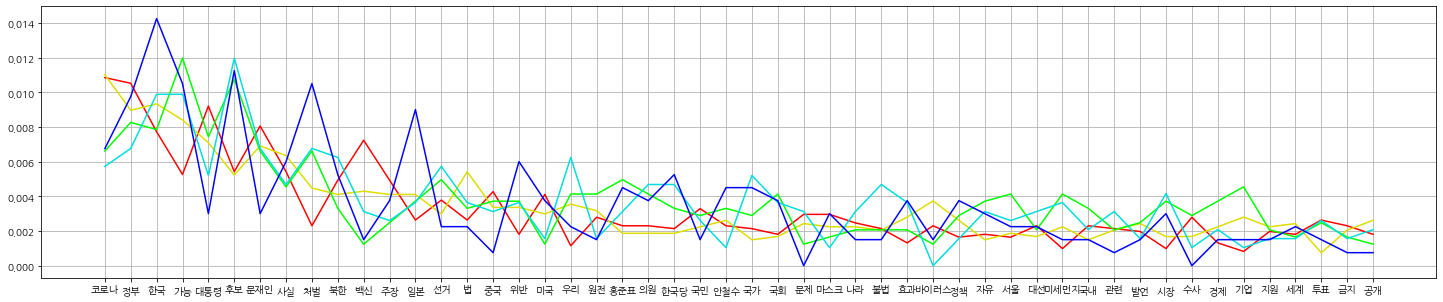

In [ ]:
x = fc_hd_50.word

plt.figure(figsize = (25,5))
plt.grid()
plt.plot(x, fc_hd_50.rate1, color = "#ff0000")
plt.plot(x, fc_hd_50.rate2, color = "#dddd00")
plt.plot(x, fc_hd_50.rate3, color = "#00ff00")
plt.plot(x, fc_hd_50.rate4, color = "#00dddd")
plt.plot(x, fc_hd_50.rate5, color = "#0000ff")